In [39]:
import pandas as pd
%pylab inline
from sklearn.model_selection import cross_val_score

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
df = pd.read_csv("data/points.csv")

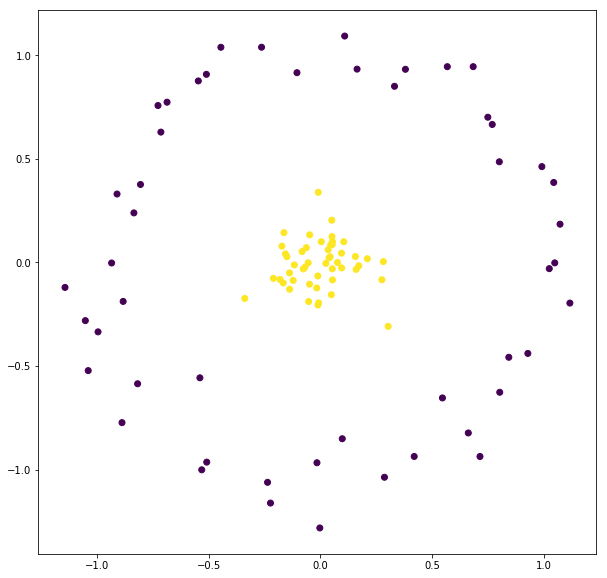

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(df["X"],df["Y"],c=df["target"])
plt.show()

In [42]:
X = df[["X","Y"]].values
y = df["target"]

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [44]:
clfg = GridSearchCV(SVC(kernel="linear", C=10),
                    param_grid={"C":range(1,200)},
                   scoring="accuracy",
                   cv=10)

In [45]:
clfg.fit(X,y)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': range(1, 200)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [46]:
clfg.best_params_

{'C': 1}

In [47]:
clfg.best_score_

0.61

In [48]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

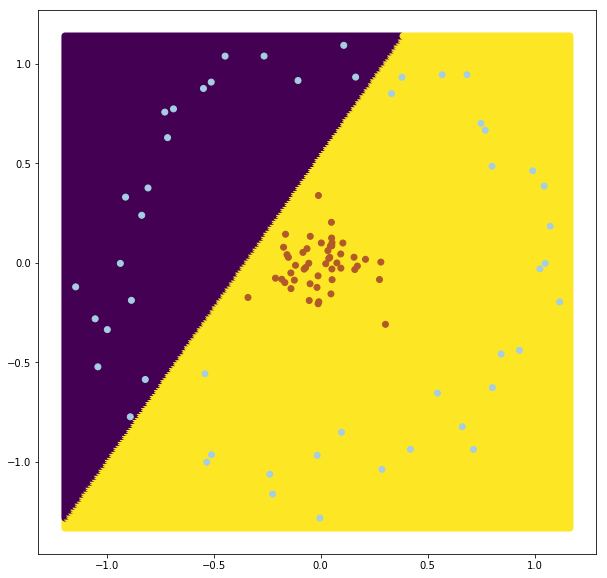

In [49]:
draw(clfg,X,y,0.01)

se podría incorporar una nueva variable, para darle altura a los puntos y separarlos con un hiperplano. 
problema:
    
    1. Tiene un coste de computación
    2. Computacionalmente cuesta mas al tener una nueva variable
    
TRUQUI:
    
    Puedes re-escribir las ecuaciones para describir la recta introducciendo un kernel. Qué significa? 
        1. Te curva el espacio para que tu líena de separación recta se convierta en curva

In [50]:
clfs2 = SVC(kernel="rbf", C=100, gamma=100) # kernerl radial. Gamma: inversamente proporcional al radio de tu círculo

In [51]:
cross_val_score(clfs2, X, y, scoring="accuracy", cv=2).mean()


0.95

In [58]:
from ipywidgets import interact
@interact(gamma=[10,100,1000,10000])
def show(gamma):
    clfs2 = SVC(kernel="rbf", C=100, gamma=gamma)
    clfs2.fit(X,y)
    draw(clfs2,X,y,0.01)

interactive(children=(Dropdown(description='gamma', options=(10, 100, 1000, 10000), value=10), Output()), _dom…

In [64]:
clfg = GridSearchCV(SVC(kernel="rbf", C=10, gamma=100),
                    param_grid={"C":range(1,200), "gamma": [1,10,100,1000,5000,10000]},
                   scoring="accuracy",
                   cv=10)


In [65]:
clfg.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': range(1, 200), 'gamma': [1, 10, 100, 1000, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [66]:
clfg.best_params_


{'C': 1, 'gamma': 1}

In [67]:
clfg.best_score_

1.0

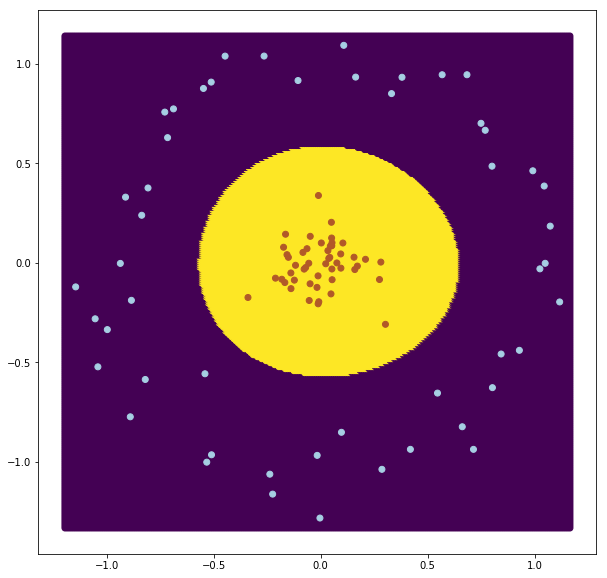

In [68]:
draw(clfg,X,y,0.01)